In [91]:
# imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import f1_score

In [92]:
# use your own file path
df = pd.read_csv("C:\Users\Jonat\dat-master\Data\Unit3\pima.csv")

In [95]:
mod = XGBClassifier(eval_metric = 'logloss')

In [96]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetic', axis = 1), df['Diabetic'], 
                                                    stratify = df['Diabetic'],
                                                    test_size = 0.2)

In [97]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    stratify = y_train,
                                                    test_size = 0.2)

In [98]:
# do an initial fitting to look at confusion matrix / classification report
mod.fit(X_train, y_train).score(X_val, y_val)

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7398373983739838

In [99]:
# and the f1_score
f1_score(mod.predict(X_val), y_val)

0.6097560975609757

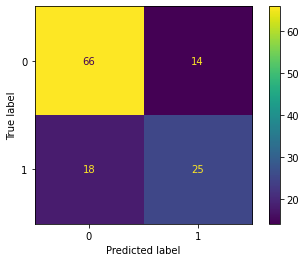

In [100]:
# look at confusion matrix to see how performance is broken down by class
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mod, X_val, y_val);

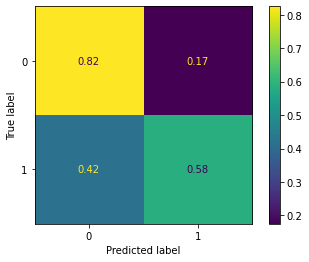

In [101]:
# or if it's easier to see it in predictions
plot_confusion_matrix(mod, X_val, y_val, normalize = 'true');

In [102]:
# and the classification report
from sklearn.metrics import classification_report

In [103]:
# and look at our results
print(classification_report(mod.predict(X_val), y_val))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        84
           1       0.58      0.64      0.61        39

    accuracy                           0.74       123
   macro avg       0.70      0.71      0.71       123
weighted avg       0.75      0.74      0.74       123



In [104]:
# and do a parameter sweet
n_estimators = [50, 100, 150, 200]
max_depth    = [3, 4, 5]
subsample    = [1.0, 0.8, 0.6]
scale_pos_weight = [1, 1 / y_train.mean(), 5]
cv_scores    = []

for estimator in n_estimators:
    for depth in max_depth:
        for sample in subsample:
            for weight in scale_pos_weight:
                mod.set_params(n_estimators = estimator, max_depth = depth, subsample = sample, scale_pos_weight = weight)
                print(f"Fitting model for {estimator} rounds, {depth} tree depth, {sample} sampling rate, {weight} positive sample weight")
                mod.fit(X_train, y_train)
                score = f1_score(mod.predict(X_val), y_val)
                cv_scores.append((score, estimator, depth, sample, weight))

Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 50 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 0.8 sampling rate, 5 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 50 rounds, 4 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 4 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 50 rounds, 5 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 50 rounds, 5 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 50 rounds, 5 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 0.8 sampling rate, 1 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 100 rounds, 3 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 3 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 100 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 1.0 sampling rate, 5 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 100 rounds, 4 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 0.8 sampling rate, 5 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 100 rounds, 4 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 4 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 1.0 sampling rate, 1 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 100 rounds, 5 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 100 rounds, 5 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 100 rounds, 5 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 100 rounds, 5 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 1.0 sampling rate, 5 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 150 rounds, 3 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 150 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag


Fitting model for 150 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 4 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting model for 150 rounds, 4 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 4 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 4 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 150 rounds, 4 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 4 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 4 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 150 rounds, 4 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 150 rounds, 5 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 150 rounds, 5 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 150 rounds, 5 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 150 rounds, 5 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 3 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 3 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 3 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 3 tree depth, 0.6 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 4 tree depth, 1.0 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Fitting model for 200 rounds, 4 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 1 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 200 rounds, 4 tree depth, 0.6 sampling rate, 5 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 5 tree depth, 1.0 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 1.0 sampling rate, 2.8713450292397664 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 1.0 sampling rate, 5 positive sample weight

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Fitting model for 200 rounds, 5 tree depth, 0.8 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 0.8 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 5 tree depth, 0.8 sampling rate, 5 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 0.6 sampling rate, 1 positive sample weight
Fitting model for 200 rounds, 5 tree depth, 0.6 sampling rate, 2.8713450292397664 positive sample weight


C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packag

Fitting model for 200 rounds, 5 tree depth, 0.6 sampling rate, 5 positive sample weight


In [105]:
# the best parameters that we were given
max(cv_scores)

(0.6666666666666666, 150, 3, 0.6, 5)

In [106]:
# reset the model for these values
mod.set_params(n_estimators = 150, max_depth = 3, subsample = 0.6, scale_pos_weight = 5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [107]:
# refit model and look at new confusion matrix
mod.fit(X_train, y_train)

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

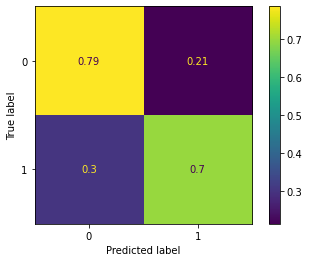

In [109]:
# prediction accuracy is better for both labels
plot_confusion_matrix(mod, X_val, y_val, normalize = 'true');

In [110]:
# and look at our results
print(classification_report(mod.predict(X_val), y_val))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        76
           1       0.70      0.64      0.67        47

    accuracy                           0.76       123
   macro avg       0.74      0.73      0.74       123
weighted avg       0.75      0.76      0.75       123



In [111]:
# and finally, get our test score as well (using the f1-metric)
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])
mod.fit(X_train, y_train)
f1_score(mod.predict(X_test), y_test)

C:\Users\Jonat\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.625